In [1]:
import pandas as pd
import os
import glob
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import figure

In [2]:
comments_data_folder = "data/dumps/comments/csv"
posts_data_folder = "data/dumps/posts/csv"
subreddits = ['PhilosophyOfRape', 'PussyPass', 'MensRights', 'seduction', 'pickup', 'askseddit', 'fPUA', 'pua', 'rsd', 'puascience', 'Incels', 'Braincels', 'TheRedPill', 'marriedredpill', 'RedPillWives', 'RedPillWomen', 'askTRP', 'RedPillParenting', 'thankTRP', 'becomeaman', 'altTRP', 'GEOTRP', 'TRPOffTopic', 'askanincel', 'BlackPillScience', 'IncelsWithoutHate', 'ForeverAlone', 'MensRightsLinks', 'MensRightsLaw', 'LadyMRAs', 'MRRef', 'MRActivism', 'masculism', 'Intactivists', 'Egalitarianism', 'Gold_Digger', 'MgtowMusic', 'MgtowBooks', 'MGTOW', 'Malecels', 'MaleForeverAlone', '1ncels', 'IncelsPurgatory', 'Truecels', 'IncelBrotherhood', 'LonelyNonViolentMen', 'Foreveraloneteens', 'ForeverAloneLondon', 'gaycel', 'incelselfies', 'gymcels', 'ForeverUnwanted', 'IncelDense', 'SupportCel', 'ForeverAloneDating', 'Truefemcels']
matching_pattern = r"^((PhilosophyOfRape)|(PussyPass)|(MensRights)|(seduction)|(pickup)|(askseddit)|(fPUA)|(pua)|(rsd)|(puascience)|(Incels)|(Braincels)|(TheRedPill)|(marriedredpill)|(RedPillWives)|(RedPillWomen)|(askTRP)|(RedPillParenting)|(thankTRP)|(becomeaman)|(altTRP)|(GEOTRP)|(TRPOffTopic)|(askanincel)|(BlackPillScience)|(IncelsWithoutHate)|(ForeverAlone)|(MensRightsLinks)|(MensRightsLaw)|(LadyMRAs)|(MRRef)|(MRActivism)|(masculism)|(Intactivists)|(Egalitarianism)|(Gold_Digger)|(MgtowMusic)|(MgtowBooks)|(MGTOW)|(Malecels)|(MaleForeverAlone)|(1ncels)|(IncelsPurgatory)|(Truecels)|(IncelBrotherhood)|(LonelyNonViolentMen)|(Foreveraloneteens)|(ForeverAloneLondon)|(gaycel)|(incelselfies)|(gymcels)|(ForeverUnwanted)|(IncelDense)|(SupportCel)|(ForeverAloneDating)|(Truefemcels))$"

In [3]:
merged_subreddit_count = pd.DataFrame(columns=["subreddit", "count"])

In [4]:
#subreddit check for comment data
total_comments = 0
for csv_file in glob.glob(os.path.join(comments_data_folder, "*.csv")):
    if "merged" not in csv_file:
        new_df = pd.read_csv(csv_file)
        new_df["count"] = 1
        total_comments += len(new_df)
        new_df = new_df[["subreddit", "count"]]
        new_df = new_df.groupby(["subreddit"]).sum().reset_index()
        merged_subreddit_count = pd.concat([merged_subreddit_count, new_df])
        del new_df
print(f"Total_comments: {total_comments}")

/tmp/ipykernel_273497/2317926634.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(csv_file)
/tmp/ipykernel_273497/2317926634.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(csv_file)


Total_comments: 15925675


In [5]:
# group merged subreddit counts to merge counts from all files
merged_subreddit_count = merged_subreddit_count.groupby(["subreddit"]).sum().reset_index()

In [6]:
merged_list = merged_subreddit_count["subreddit"].tolist()
merged_list = [s.lower() for s in merged_list]
missing_subreddits = [subreddit for subreddit in subreddits if subreddit.lower() not in merged_list]
print(len(subreddits))
print(f"Missing subreddits: {', '.join(missing_subreddits)}")

56
Missing subreddits: PhilosophyOfRape, Malecels, 1ncels, IncelsPurgatory, Truecels, IncelBrotherhood, LonelyNonViolentMen


In [7]:
merged_subreddit_count = merged_subreddit_count.sort_values("count")
merged_subreddit_count

,subreddit,count
6,Foreveralonelondon,1
46,puascience,10
36,gaycel,12
17,MRRef,16
40,mensrightslaw,17
7,GEOTRP,34
41,mensrightslinks,61
26,ThankTRP,73
35,foreveraloneteens,92
45,pua,103


In [8]:
merged_subreddit_count_posts = pd.DataFrame(columns=["subreddit", "count"])

In [9]:
#subreddit check for post data
total_posts = 0
for csv_file in glob.glob(os.path.join(posts_data_folder, "*.csv")):
    if "merged" not in csv_file:
        new_df = pd.read_csv(csv_file)
        new_df["count"] = 1
        total_posts += len(new_df)
        new_df = new_df[["subreddit", "count"]]
        new_df = new_df.groupby(["subreddit"]).sum().reset_index()
        merged_subreddit_count_posts = pd.concat([merged_subreddit_count_posts, new_df])
        del new_df
print(f"Total_comments: {total_posts}")

Total_comments: 1192538


In [10]:
len(merged_subreddit_count_posts["subreddit"].unique().tolist())

49

In [11]:
# group merged subreddit counts to merge counts from all files
merged_subreddit_count_posts = merged_subreddit_count_posts.groupby(["subreddit"]).sum().reset_index()
merged_subreddit_count_posts = merged_subreddit_count_posts.sort_values("count")
merged_subreddit_count_posts

,subreddit,count
45,pua,1
6,Foreveralonelondon,2
36,gaycel,4
28,Truefemcels,30
17,MRRef,35
40,mensrightslaw,47
35,foreveraloneteens,59
46,puascience,80
29,altTRP,80
21,RedPillParenting,81


In [12]:
posts_subreddits = merged_subreddit_count_posts["subreddit"].tolist()
posts_subreddits = [s.lower() for s in merged_list]
missing_subreddits = [subreddit for subreddit in subreddits if subreddit.lower() not in posts_subreddits]
print(len(subreddits))
print(f"Missing subreddits: {', '.join(missing_subreddits)}")

56
Missing subreddits: PhilosophyOfRape, Malecels, 1ncels, IncelsPurgatory, Truecels, IncelBrotherhood, LonelyNonViolentMen


In [13]:
timestamp_df = pd.DataFrame(columns=["created_utc"])

In [14]:
#timestamps
#subreddit check for post data
for csv_file in glob.glob(os.path.join(posts_data_folder, "*.csv")):
    if "merged" not in csv_file:
        new_df = pd.read_csv(csv_file)
        new_df["count"] = 1
        total_posts += len(new_df)
        new_df = new_df[["created_utc", "count"]]
        new_df.dropna(inplace=True)
        new_df["created_utc"] = new_df["created_utc"].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))
        new_df = new_df.groupby(["created_utc"]).sum().reset_index()
        timestamp_df = pd.concat([timestamp_df, new_df])
        del new_df

for csv_file in glob.glob(os.path.join(comments_data_folder, "*.csv")):
    if "merged" not in csv_file:
        print(csv_file)
        new_df = pd.read_csv(csv_file)
        new_df["count"] = 1
        total_posts += len(new_df)
        new_df = new_df[["created_utc", "count"]]
        new_df.dropna(inplace=True)
        new_df["created_utc"] = new_df["created_utc"].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))
        new_df = new_df.groupby(["created_utc"]).sum().reset_index()
        timestamp_df = pd.concat([timestamp_df, new_df])
        del new_df

data/dumps/comments/csv/RC_2018-05.csv
data/dumps/comments/csv/RC_2018-03.csv
data/dumps/comments/csv/RC_2020-03.csv
data/dumps/comments/csv/RC_2020-08.csv
data/dumps/comments/csv/RC_2019-10.csv
data/dumps/comments/csv/RC_2021-06.csv
data/dumps/comments/csv/RC_2020-12.csv
data/dumps/comments/csv/RC_2018-08.csv
data/dumps/comments/csv/RC_2020-11.csv
data/dumps/comments/csv/RC_2018-10.csv
data/dumps/comments/csv/RC_2018-07.csv
data/dumps/comments/csv/RC_2019-07.csv
data/dumps/comments/csv/RC_2019-08.csv
data/dumps/comments/csv/RC_2019-01.csv
data/dumps/comments/csv/RC_2021-04.csv
data/dumps/comments/csv/RC_2018-04.csv
data/dumps/comments/csv/RC_2020-05.csv
data/dumps/comments/csv/RC_2018-09.csv
data/dumps/comments/csv/RC_2019-04.csv
data/dumps/comments/csv/RC_2021-05.csv
data/dumps/comments/csv/RC_2021-01.csv
data/dumps/comments/csv/RC_2017-07.csv


/tmp/ipykernel_273497/2058282074.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(csv_file)
/tmp/ipykernel_273497/2058282074.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)
/tmp/ipykernel_273497/2058282074.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["created_utc"] = new_df["created_utc"].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))


data/dumps/comments/csv/RC_2020-06.csv
data/dumps/comments/csv/RC_2019-02.csv
data/dumps/comments/csv/RC_2018-02.csv
data/dumps/comments/csv/RC_2020-10.csv
data/dumps/comments/csv/RC_2017-08.csv
data/dumps/comments/csv/RC_2017-09.csv
data/dumps/comments/csv/RC_2021-03.csv
data/dumps/comments/csv/RC_2019-06.csv
data/dumps/comments/csv/RC_2019-12.csv
data/dumps/comments/csv/RC_2019-03.csv
data/dumps/comments/csv/RC_2020-07.csv
data/dumps/comments/csv/RC_2019-09.csv
data/dumps/comments/csv/RC_2017-10.csv
data/dumps/comments/csv/RC_2018-06.csv
data/dumps/comments/csv/RC_2020-09.csv
data/dumps/comments/csv/RC_2018-12.csv
data/dumps/comments/csv/RC_2018-11.csv
data/dumps/comments/csv/RC_2017-11.csv
data/dumps/comments/csv/RC_2019-11.csv
data/dumps/comments/csv/RC_2020-01.csv
data/dumps/comments/csv/RC_2020-02.csv
data/dumps/comments/csv/RC_2021-02.csv
data/dumps/comments/csv/RC_2020-04.csv


/tmp/ipykernel_273497/2058282074.py:18: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(csv_file)


data/dumps/comments/csv/RC_2018-01.csv
data/dumps/comments/csv/RC_2017-12.csv
data/dumps/comments/csv/RC_2019-05.csv


In [15]:
timestamp_df = timestamp_df.groupby("created_utc").sum().reset_index()
timestamp_df.sort_values("created_utc")

,created_utc,count
0,2017-07,322292.0
1,2017-08,364585.0
2,2017-09,380746.0
3,2017-10,441218.0
4,2017-11,317435.0
5,2017-12,323404.0
6,2018-01,391148.0
7,2018-02,392021.0
8,2018-03,490911.0
9,2018-04,524841.0


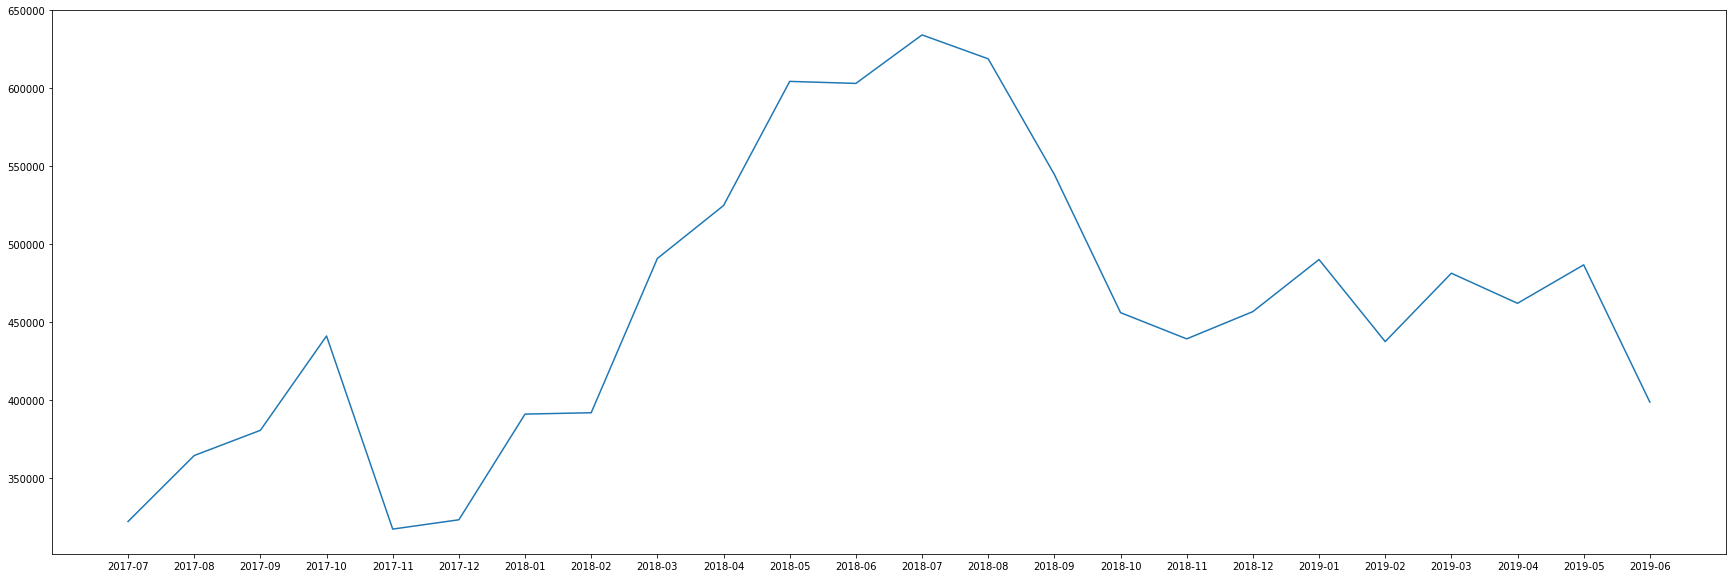

In [19]:
plt.figure(figsize=(30,10))
plt.plot(timestamp_df["created_utc"][:24], timestamp_df["count"][:24])

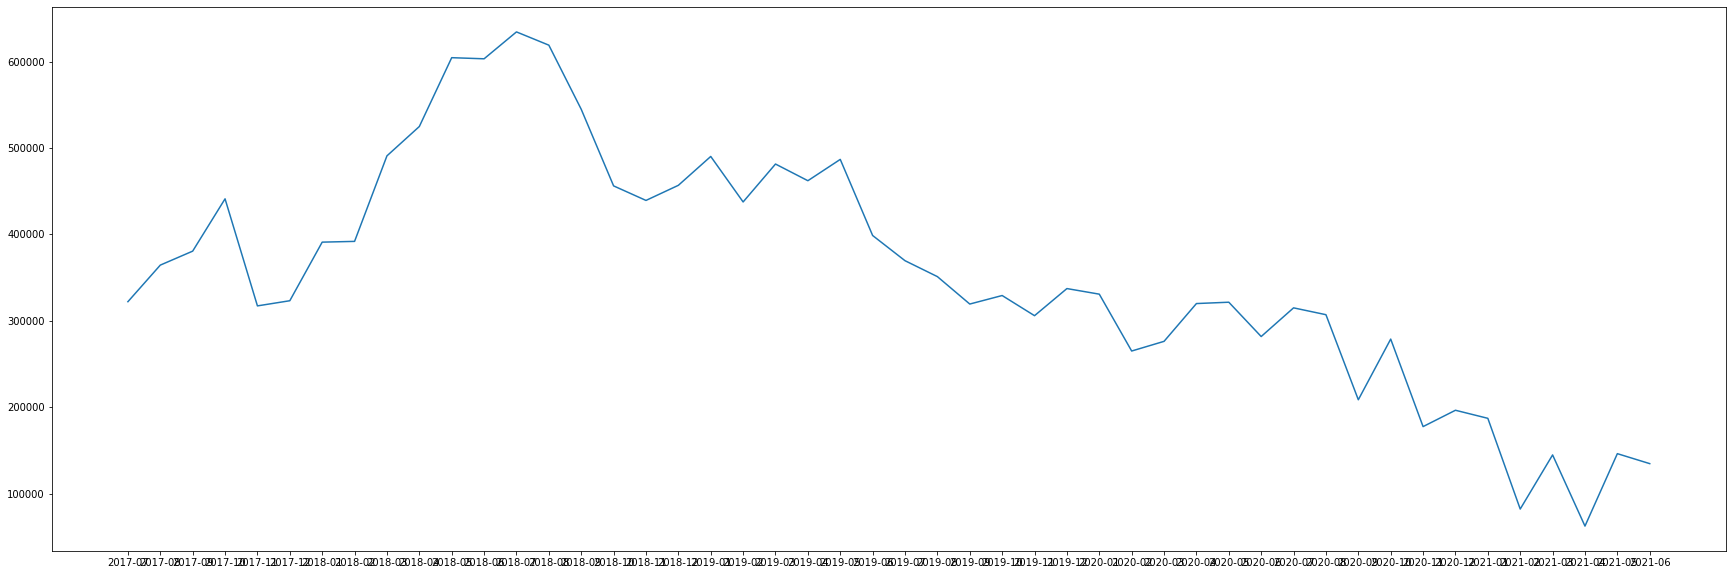

In [20]:
plt.figure(figsize=(30,10))
plt.plot(timestamp_df["created_utc"], timestamp_df["count"])